In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
outdir = "output/fourierstuff/"

### Sum of periodic signals

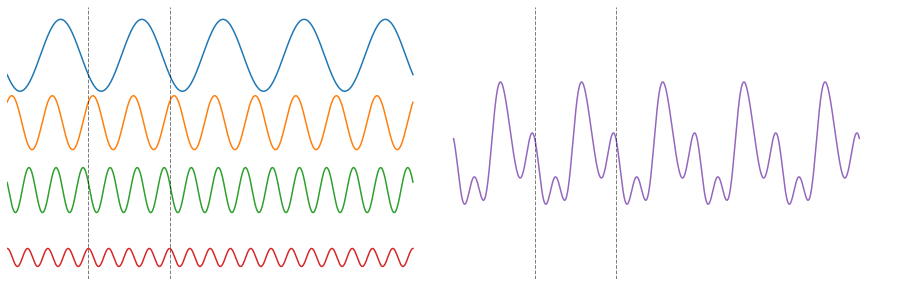

In [29]:
t = np.arange(0, 5, 0.001)
f = 1.0
phi = np.random.rand(4) * 2 * np.pi
s1 = 0.8 * np.sin(2 * np.pi * f * t + phi[0])
s2 = 0.6 * np.sin(2 * np.pi * 2 * f * t + phi[1])
s3 = 0.5 * np.sin(2 * np.pi * 3 * f * t + phi[2])
s4 = 0.2 * np.sin(2 * np.pi * 4 * f * t + phi[3])

fig = figure(figsize=(16, 5))
ax = fig.add_subplot(111)
ax.plot(t, s1 + 2.25)
ax.plot(t, s2 + 0.75)
ax.plot(t, s3 - 0.75)
ax.plot(t, s4 - 2.25)
ax.plot(t + 5.5, s1 + s2 + s3 + s4)
ax.axvline(1.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.axvline(2.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.axvline(6.5, color='k', alpha=0.5, lw=1.0, ls="--")
ax.axvline(7.5, color='k', alpha=0.5, lw=1.0, ls="--")
ax.set_xlim(0, 11)
ax.axis("off")

fig.savefig(f"{outdir}/sinesums.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/sinesums.png", format="png", dpi=300);

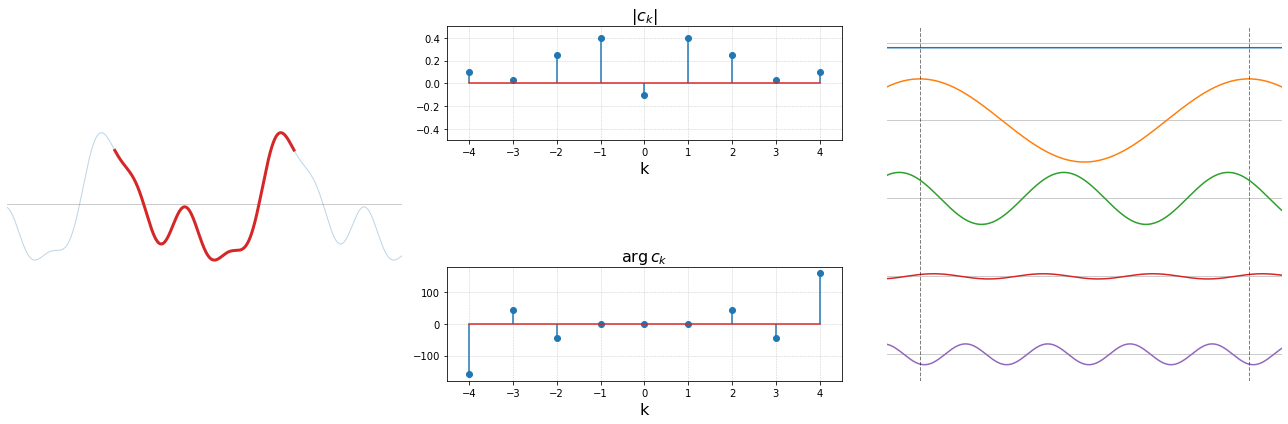

In [4]:
t = np.arange(-5, 5, 0.001)
f = 1.0
amp = np.array([-0.1, 0.8, 0.5, 0.05, 0.2])
phi = np.array([0, 0, 45, -45, 160]) * np.pi / 180.
N = len(amp)
sk = np.array([amp[k] * np.cos(2 * k * np.pi * f * t + phi[k])
               for k in range(N)])
x = np.sum(sk, axis=0)

fig = figure(figsize=(18, 6))
grid = plt.GridSpec(5, 3)
ax = plt.subplot(grid[:, 0])
ax.axhline(0, color="0.8", lw=1)
ax.plot(t, x, alpha=0.3, color="tab:blue", lw=1)
_inx = (t >= 0) * (t <=1.0)
ax.plot(t[_inx] , x[_inx], color="tab:red", lw=3)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(-3, 3)
ax.axis("off")

ax = plt.subplot(grid[:2, 1])
# Magnitude.
k = np.arange(-(N-1), N, 1)
mag = np.hstack((0.5 * amp[1:][::-1], amp[0:1], 0.5 * amp[1:]))
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.stem(k, mag)
ax.set_xlim(-N+1-0.5, N-1+0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_title(r"$\vert c_k \vert$", fontsize=16)
ax.set_xlabel(r"k", fontsize=16)

ax = plt.subplot(grid[3:, 1])
# Magnitude.
k = np.arange(-(N-1), N, 1)
ph = np.hstack((-phi[1:][::-1], phi)) * 180 / np.pi
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.stem(k, ph)
ax.set_xlim(-N+1-0.5, N-1+0.5)
ax.set_ylim(-180, 180)
ax.set_title(r"$\arg \, c_k$", fontsize=16)
ax.set_xlabel(r"k", fontsize=16)

ax = plt.subplot(grid[:, 2])
ax.axhline(3.75, color="0.8", lw=1)
ax.plot(t, sk[0] + 3.75)
ax.axhline(2.25, color="0.8", lw=1)
ax.plot(t, sk[1] + 2.25)
ax.axhline(0.75, color="0.8", lw=1)
ax.plot(t, sk[2] + 0.75)
ax.axhline(-0.75, color="0.8", lw=1)
ax.plot(t, sk[3] - 0.75)
ax.axhline(-2.25, color="0.8", lw=1)
ax.plot(t, sk[4] - 2.25)
ax.axvline(0.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.axvline(1.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.set_xlim(-0.1, 1.1)
ax.axis("off")

plt.tight_layout()

fig.savefig(f"{outdir}/fs-demo.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-demo.png", format="png", dpi=300);

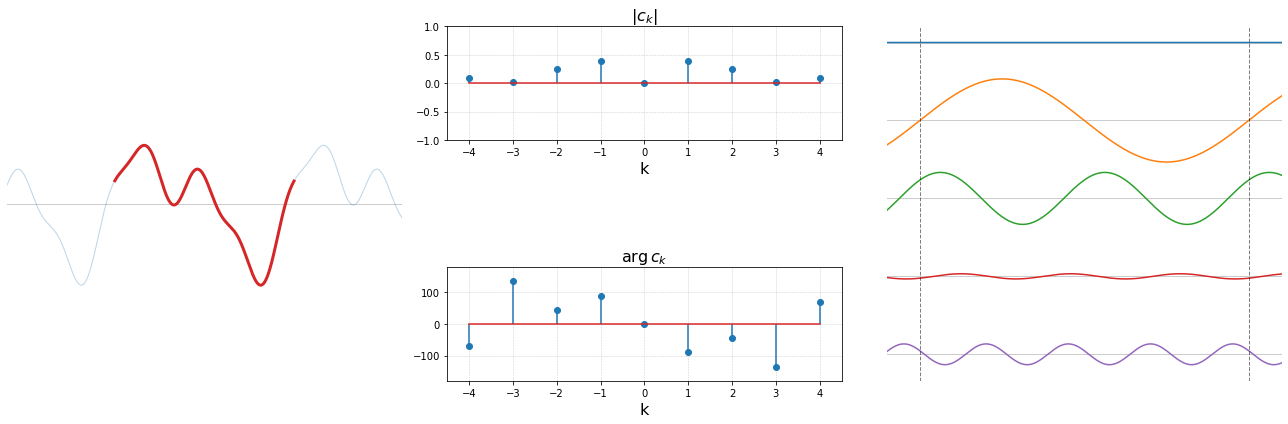

In [5]:
t = np.arange(-5, 5, 0.001)
f = 1.0
amp = np.array([-0.1, 0.8, 0.5, 0.05, 0.2])
phi = np.array([0, 0, 45, -45, 160]) * np.pi / 180.
N = len(amp)
sk = np.array([amp[k] * np.sin(2 * k * np.pi * f * t + phi[k])
               for k in range(N)])
x = np.sum(sk, axis=0)

fig = figure(figsize=(18, 6))
grid = plt.GridSpec(5, 3)
ax = plt.subplot(grid[:, 0])
ax.axhline(0, color="0.8", lw=1)
ax.plot(t, x, alpha=0.3, color="tab:blue", lw=1)
_inx = (t >= 0) * (t <=1.0)
ax.plot(t[_inx] , x[_inx], color="tab:red", lw=3)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(-3, 3)
ax.axis("off")

ax = plt.subplot(grid[:2, 1])
# Magnitude.
k = np.arange(-(N-1), N, 1)
mag = np.hstack((0.5 * amp[1:][::-1], [0], 0.5 * amp[1:]))
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.stem(k, mag)
ax.set_xlim(-N+1-0.5, N-1+0.5)
ax.set_ylim(-1, 1)
ax.set_title(r"$\vert c_k \vert$", fontsize=16)
ax.set_xlabel(r"k", fontsize=16)

ax = plt.subplot(grid[3:, 1])
# Magnitude.
k = np.arange(-(N-1), N, 1)
ph = np.hstack((-(phi[1:][::-1] - 0.5 * np.pi),
                phi[0],
                phi[1:] - 0.5 * np.pi)) * 180 / np.pi
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.stem(k, ph)
ax.set_xlim(-N+1-0.5, N-1+0.5)
ax.set_ylim(-180, 180)
ax.set_title(r"$\arg \, c_k$", fontsize=16)
ax.set_xlabel(r"k", fontsize=16)

ax = plt.subplot(grid[:, 2])
ax.axhline(3.75, color="0.8", lw=1)
ax.plot(t, sk[0] + 3.75)
ax.axhline(2.25, color="0.8", lw=1)
ax.plot(t, sk[1] + 2.25)
ax.axhline(0.75, color="0.8", lw=1)
ax.plot(t, sk[2] + 0.75)
ax.axhline(-0.75, color="0.8", lw=1)
ax.plot(t, sk[3] - 0.75)
ax.axhline(-2.25, color="0.8", lw=1)
ax.plot(t, sk[4] - 2.25)
ax.axvline(0.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.axvline(1.0, color='k', alpha=0.5, lw=1.0, ls="--")
ax.set_xlim(-0.1, 1.1)
ax.axis("off")

plt.tight_layout()

fig.savefig(f"{outdir}/fs-demo-sin.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-demo-sin.png", format="png", dpi=300);

# Fourier Series of A Square Wave

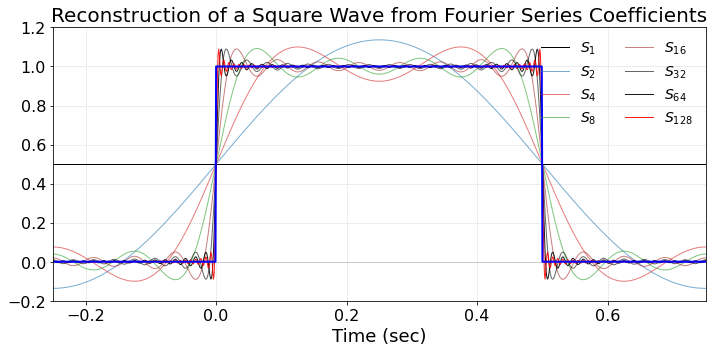

In [43]:
t = np.arange(-0.25, 1.25, 0.001)
f = 1.0
N = [1, 2, 4, 8, 16, 32, 64, 128]

# Find partial sums
w0 = 2 * np.pi
par_sum = np.zeros((len(N), len(t)))
for i, _n in enumerate(N):
    for k in range(_n):
        if k == 0:
            par_sum[i, :] = 0.5
        else:
            amp = np.sinc(k / 2)
            ph = - k * w0 / 4
            par_sum[i, :] += amp * np.cos(k * w0 * t + ph) 

fig = figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.axhline(0, color="0.8", lw=1)
ax.plot(t, par_sum[0], lw=1, color="black", alpha=1, label=f"$S_{{{N[0]}}}$")
ax.plot(t, par_sum[1], lw=1, color="tab:blue", alpha=0.6, label=f"$S_{{{N[1]}}}$")
ax.plot(t, par_sum[2], lw=1, color="tab:red", alpha=0.6, label=f"$S_{{{N[2]}}}$")
ax.plot(t, par_sum[3], lw=1, color="tab:green", alpha=0.6, label=f"$S_{{{N[3]}}}$")
ax.plot(t, par_sum[4], lw=1, color="brown", alpha=0.6, label=f"$S_{{{N[4]}}}$")
ax.plot(t, par_sum[5], lw=1, color="black", alpha=0.6, label=f"$S_{{{N[5]}}}$")
ax.plot(t, par_sum[6], lw=1, color="black", alpha=0.9, label=f"$S_{{{N[6]}}}$")
ax.plot(t, par_sum[7], lw=1, color="red", alpha=0.9, label=f"$S_{{{N[7]}}}$")
ax.plot(t, [(0 <= _t <= 0.5) for _t in t], lw=2, color="blue")
legend(loc=1, frameon=False, fontsize=14, ncol=2)
ax.set_xlim(-0.25, 0.75)
ax.set_xlabel("Time (sec)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_title("Reconstruction of a Square Wave from Fourier Series Coefficients", fontsize=20)

plt.tight_layout()

fig.savefig(f"{outdir}/fs-sqwave.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-sqwave.png", format="png", dpi=300);

# Fourier Series Representation of a Triangular Wave

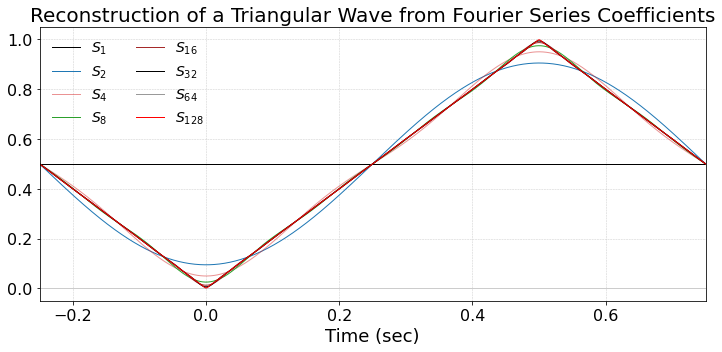

In [44]:
t = np.arange(-0.25, 1.25, 0.001)
f = 1.0
N = [1, 2, 4, 8, 16, 32, 64, 128]

# Find partial sums
w0 = 2 * np.pi
par_sum = np.zeros((len(N), len(t)))
for i, _n in enumerate(N):
    for k in range(_n):
        if k == 0:
            par_sum[i, :] = 0.5
        else:
            amp = np.power(np.sinc(k / 2), 2)
            ph = - k * w0 / 2
            par_sum[i, :] += amp * np.cos(k * w0 * t + ph) 

fig = figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.grid(color='0.8', linestyle='--', linewidth=0.5);
ax.axhline(0, color="0.8", lw=1)
ax.plot(t, par_sum[0], lw=1, color="black", alpha=1, label=f"$S_{{{N[0]}}}$")
ax.plot(t, par_sum[1], lw=1, color="tab:blue", alpha=1, label=f"$S_{{{N[1]}}}$")
ax.plot(t, par_sum[2], lw=1, color="tab:red", alpha=0.5, label=f"$S_{{{N[2]}}}$")
ax.plot(t, par_sum[3], lw=1, color="tab:green", alpha=1, label=f"$S_{{{N[3]}}}$")
ax.plot(t, par_sum[4], lw=1, color="brown", alpha=1, label=f"$S_{{{N[4]}}}$")
ax.plot(t, par_sum[5], lw=1, color="black", alpha=1, label=f"$S_{{{N[5]}}}$")
ax.plot(t, par_sum[6], lw=1, color="black", alpha=0.4, label=f"$S_{{{N[6]}}}$")
ax.plot(t, par_sum[7], lw=1, color="red", alpha=1.0, label=f"$S_{{{N[7]}}}$")
ax.legend(loc=2, frameon=False, fontsize=14, ncol=2)
ax.set_xlim(-0.25, 0.75)
ax.set_xlabel("Time (sec)", fontsize=18)
ax.set_xlabel("Time (sec)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_title("Reconstruction of a Triangular Wave from Fourier Series Coefficients", fontsize=20)

plt.tight_layout()

fig.savefig(f"{outdir}/fs-triwave.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-triwave.png", format="png", dpi=300);

No handles with labels found to put in legend.


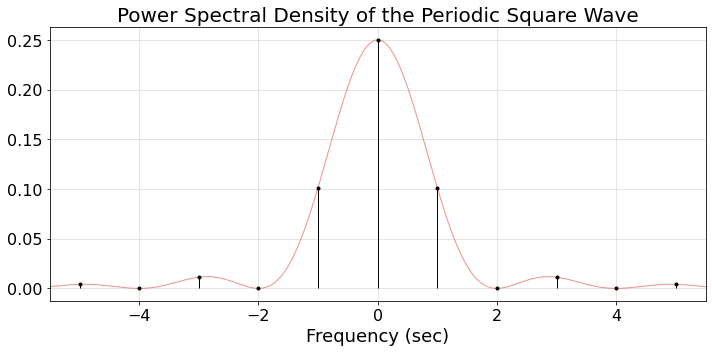

In [66]:
k = np.arange(-10, 11, 1)
psd = np.power(0.5 * np.sinc(k/ 2), 2)
kc = np.arange(-10, 11, 0.01)
psdc = np.power(0.5 * np.sinc(kc/ 2), 2)

fig = figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(kc, psdc, color="tab:red", lw=1, alpha=0.5)
markerline, stemlines, baseline = ax.stem(k, psd, basefmt=" ")
plt.setp(stemlines, 'linewidth', 1, 'color', "black")
plt.setp(markerline, "marker", ".", "color", "black")
ax.set_xlim(-5.5, 5.5)
legend(loc=1, frameon=False, fontsize=14, ncol=2)
ax.set_xlabel("Frequency (sec)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_title("Power Spectral Density of the Periodic Square Wave", fontsize=20)

plt.tight_layout()

fig.savefig(f"{outdir}/fs-sqwave-psd.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-sqwave-psd.png", format="png", dpi=300);

No handles with labels found to put in legend.


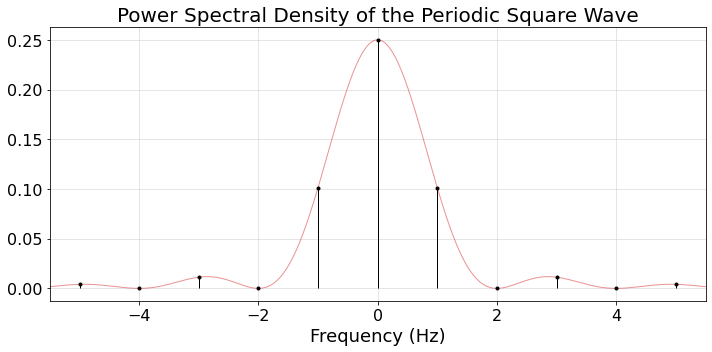

In [67]:
k = np.arange(-10, 11, 1)
psd = np.power(0.5 * np.sinc(k/ 2), 2)
kc = np.arange(-10, 11, 0.01)
psdc = np.power(0.5 * np.sinc(kc/ 2), 2)

fig = figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(kc, psdc, color="tab:red", lw=1, alpha=0.5)
markerline, stemlines, baseline = ax.stem(k, psd, basefmt=" ")
plt.setp(stemlines, 'linewidth', 1, 'color', "black")
plt.setp(markerline, "marker", ".", "color", "black")
ax.set_xlim(-5.5, 5.5)
legend(loc=1, frameon=False, fontsize=14, ncol=2)
ax.set_xlabel("Frequency (Hz)", fontsize=18)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_title("Power Spectral Density of the Periodic Square Wave", fontsize=20)

plt.tight_layout()

fig.savefig(f"{outdir}/fs-sqwave-psd.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-sqwave-psd.png", format="png", dpi=300);

# Fourier series for various time periods

In [89]:
def get_fs_sqwave(tau, T0, klim=1000, dk=1):
    k = np.arange(-klim, klim, dk)
    return (tau / T0) * np.sinc(k * tau / T0)

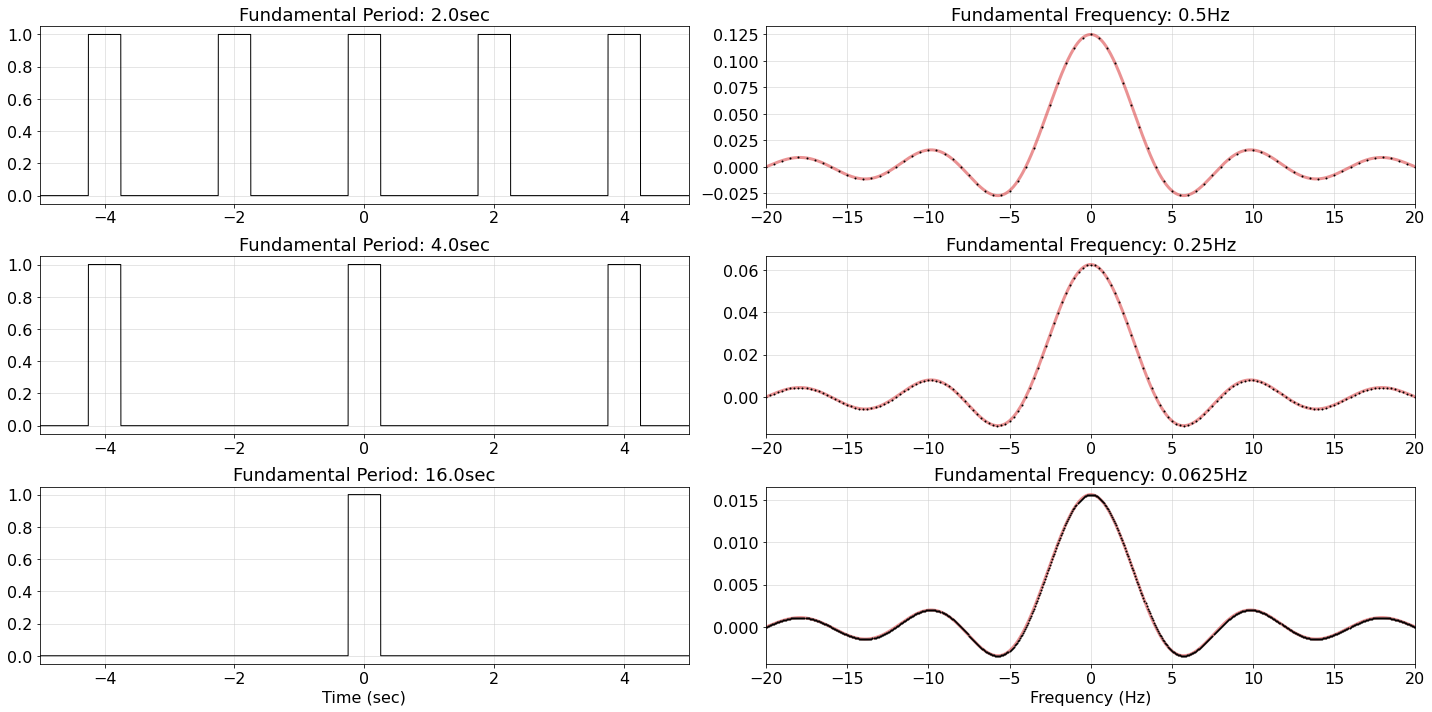

In [130]:
t = np.arange(-10, 10, 0.001)
tau = 0.25
T0 = [1.0, 2.0, 4.0, 16.0]
klim, dk = 1000, 0.01
xin = [np.abs(t % _T - 0.5 * _T) >= (0.5 * _T - tau) for _T in T0]
ck =  [get_fs_sqwave(tau, _T, klim) for _T in T0]
ckc =  [get_fs_sqwave(tau, _T, klim, dk) for _T in T0]

k = np.arange(-klim, klim, 1)
kc = np.arange(-klim, klim, dk)

fig = figure(figsize=(20, 10))
ax = fig.add_subplot(321)
inx = 1
ax.grid(color='0.8', linewidth=0.5)
ax.plot(t, xin[inx], color="black", lw=1)
ax.set_xlim(-5, 5)
xticks(fontsize=16)
yticks(fontsize=16)
# ax.set_xlabel("Time (sec)", fontsize=16)
ax.set_title(f"Fundamental Period: {T0[inx]}sec", fontsize=18)
ax = fig.add_subplot(322)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(kc / T0[inx], ckc[inx], lw=3, color="tab:red", alpha=0.5)
ax.plot(k / T0[inx], ck[inx], '.', color="black", markersize=2)
ax.set_xlim(-20, 20)
xticks(fontsize=16)
yticks(fontsize=16)
# ax.set_xlabel("Frequency (Hz)", fontsize=16)
ax.set_title(f"Fundamental Frequency: {1/T0[inx]}Hz", fontsize=18)

ax = fig.add_subplot(323)
ax.grid(color='0.8', linewidth=0.5)
inx = 2
ax.plot(t, xin[inx], color="black", lw=1)
ax.set_xlim(-5, 5)
xticks(fontsize=16)
yticks(fontsize=16)
# ax.set_xlabel("Time (sec)", fontsize=16)
ax.set_title(f"Fundamental Period: {T0[inx]}sec", fontsize=18)
ax = fig.add_subplot(324)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(kc / T0[inx], ckc[inx], lw=3, color="tab:red", alpha=0.5)
ax.plot(k / T0[inx], ck[inx], '.', color="black", markersize=2)
ax.set_xlim(-20, 20)
xticks(fontsize=16)
yticks(fontsize=16)
# ax.set_xlabel("Frequency (Hz)", fontsize=16)
ax.set_title(f"Fundamental Frequency: {1/T0[inx]}Hz", fontsize=18)

ax = fig.add_subplot(325)
ax.grid(color='0.8', linewidth=0.5)
inx = 3
ax.plot(t, xin[inx], color="black", lw=1)
ax.set_xlim(-5, 5)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_xlabel("Time (sec)", fontsize=16)
ax.set_title(f"Fundamental Period: {T0[inx]}sec", fontsize=18)
ax = fig.add_subplot(326)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(kc / T0[inx], ckc[inx], lw=3, color="tab:red", alpha=0.5)
ax.plot(k / T0[inx], ck[inx], '.', color="black", markersize=2)
ax.set_xlim(-20, 20)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_xlabel("Frequency (Hz)", fontsize=16)
ax.set_title(f"Fundamental Frequency: {1/T0[inx]}Hz", fontsize=18)

plt.tight_layout()


fig.savefig(f"{outdir}/fs-cont.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/fs-cont.png", format="png", dpi=300);

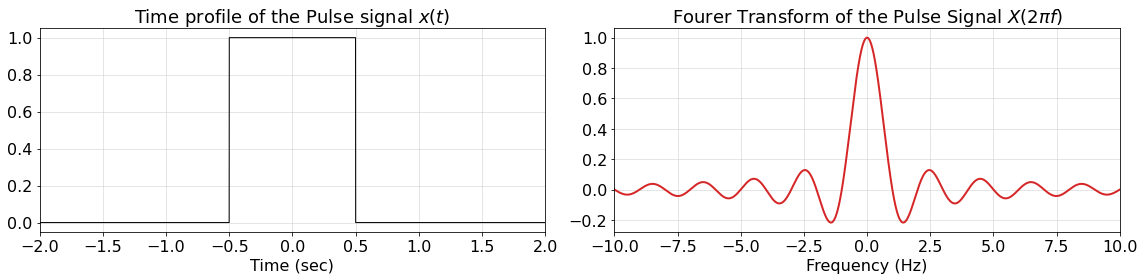

In [16]:
t = np.arange(-10, 10, 0.001)
tau = 1
xin = np.abs(t) <= 0.5 * tau

freq = np.arange(-10, 10, 0.001)

fig = figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(t, xin, color="black", lw=1)
ax.set_xlim(-2, 2)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_xlabel("Time (sec)", fontsize=16)
ax.set_title(f"Time profile of the Pulse signal $x(t)$", fontsize=18)
ax = fig.add_subplot(122)
ax.grid(color='0.8', linewidth=0.5)
ax.plot(freq, tau * np.sinc(freq * tau), lw=2, color="tab:red")
ax.set_xlim(-10, 10)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_xlabel("Frequency (Hz)", fontsize=16)
ax.set_title(f"Fourer Transform of the Pulse Signal $X(2 \\pi f$)", fontsize=18)

plt.tight_layout()


fig.savefig(f"{outdir}/ft-pulse.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/ft-pulse.png", format="png", dpi=300);